<a href="https://colab.research.google.com/github/ragibaunjum/crude_oil_prices_forecasting/blob/main/Grid_Search_FNN_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Daily frequency data, collected from January 01, 2000 to till now. Open source data collect form US St. Louis Frederal Reserve Bank using API call via pandas_datareader. 24 factors consider for the model.  

In [ ]:
!pip install quandl

In [ ]:
#import library & Call Fred API
import pandas as pd
import pandas_datareader.data as web
import quandl
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns', 999)
pd.set_option('max_rows', 99999)

series_list = ['NIKKEI225', 'BAMLHE00EHYIOAS', 'IOER', 'EMVELECTGOVRN', 'SMU36000008081390001SA',
               'SP500', 'NASDAQCOM', 'DJIA', 'BOGMBASEW','DEXJPUS', 'DEXUSEU', 'DEXCHUS', 'DEXUSAL',
              'VIXCLS', 'USDONTD156N', 'USD1MTD156N', 'USD3MTD156N', 'USD12MD156N',
              'BAMLHYH0A0HYM2TRIV', 'BAMLCC0A1AAATRIV',
              'GOLDAMGBD228NLBM',
              'DCOILWTICO',
              'MHHNGSP',
              'VXXLECLS']
start = datetime(2000, 1, 1)
# end = datetime.now()
end = datetime(2021, 2, 1)
# end = datetime(2021, 1, 24)

def get_fred_data(series_list, start, end):
    fred_df = pd.DataFrame()
    for i, series in enumerate(series_list):
        print('Calling FRED API for Series:  {}'.format(series))
        if i == 0:
            fred_df = web.get_data_fred(series, start, end)
        else:
            _df = web.get_data_fred(series, start, end)
            fred_df = fred_df.join(_df, how='outer')
    return fred_df

econ_df = get_fred_data(series_list, start, end)
econ_df.head()

Calling FRED API for Series:  NIKKEI225
Calling FRED API for Series:  BAMLHE00EHYIOAS
Calling FRED API for Series:  IOER
Calling FRED API for Series:  EMVELECTGOVRN
Calling FRED API for Series:  SMU36000008081390001SA
Calling FRED API for Series:  SP500
Calling FRED API for Series:  NASDAQCOM
Calling FRED API for Series:  DJIA
Calling FRED API for Series:  BOGMBASEW
Calling FRED API for Series:  DEXJPUS
Calling FRED API for Series:  DEXUSEU
Calling FRED API for Series:  DEXCHUS
Calling FRED API for Series:  DEXUSAL
Calling FRED API for Series:  VIXCLS
Calling FRED API for Series:  USDONTD156N
Calling FRED API for Series:  USD1MTD156N
Calling FRED API for Series:  USD3MTD156N
Calling FRED API for Series:  USD12MD156N
Calling FRED API for Series:  BAMLHYH0A0HYM2TRIV
Calling FRED API for Series:  BAMLCC0A1AAATRIV
Calling FRED API for Series:  GOLDAMGBD228NLBM
Calling FRED API for Series:  DCOILWTICO
Calling FRED API for Series:  MHHNGSP
Calling FRED API for Series:  VXXLECLS


,NIKKEI225,BAMLHE00EHYIOAS,IOER,EMVELECTGOVRN,SMU36000008081390001SA,SP500,NASDAQCOM,DJIA,BOGMBASEW,DEXJPUS,DEXUSEU,DEXCHUS,DEXUSAL,VIXCLS,USDONTD156N,USD1MTD156N,USD3MTD156N,USD12MD156N,BAMLHYH0A0HYM2TRIV,BAMLCC0A1AAATRIV,GOLDAMGBD228NLBM,DCOILWTICO,MHHNGSP,VXXLECLS
DATE,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-01,NaN,NaN,NaN,0.40981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.42,NaN
2000-01-03,NaN,5.31,NaN,NaN,NaN,NaN,4131.15,NaN,NaN,101.70,1.0155,8.2798,0.6591,24.21,NaN,NaN,NaN,NaN,363.62,242.91,NaN,NaN,NaN,NaN
2000-01-04,19002.86,5.47,NaN,NaN,NaN,NaN,3901.69,NaN,NaN,103.09,1.0309,8.2799,0.6562,27.01,NaN,5.81000,6.0425,6.60000,363.04,243.93,282.05,25.56,NaN,NaN
2000-01-05,18542.55,5.47,NaN,NaN,NaN,NaN,3877.54,NaN,626869.0,103.77,1.0335,8.2798,0.6550,26.41,NaN,5.79250,6.0300,6.57125,362.31,242.59,282.10,24.65,NaN,NaN
2000-01-06,18168.27,5.46,NaN,NaN,NaN,NaN,3727.13,NaN,NaN,105.19,1.0324,8.2797,0.6540,25.73,NaN,5.79125,6.0300,6.58000,362.42,243.40,280.35,24.79,NaN,NaN


Last five days value.

In [ ]:
econ_df.tail()

,NIKKEI225,BAMLHE00EHYIOAS,IOER,EMVELECTGOVRN,SMU36000008081390001SA,SP500,NASDAQCOM,DJIA,BOGMBASEW,DEXJPUS,DEXUSEU,DEXCHUS,DEXUSAL,VIXCLS,USDONTD156N,USD1MTD156N,USD3MTD156N,USD12MD156N,BAMLHYH0A0HYM2TRIV,BAMLCC0A1AAATRIV,GOLDAMGBD228NLBM,DCOILWTICO,MHHNGSP,VXXLECLS
DATE,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-28,28197.42,3.54,0.1,NaN,NaN,3787.38,13337.16,30603.36,NaN,104.31,1.2122,6.4491,0.7674,30.21,0.07925,0.12288,0.20500,0.31075,1505.23,785.33,1839.65,52.26,NaN,44.95
2021-01-29,27663.39,3.43,0.1,NaN,NaN,3714.24,13070.69,29982.62,NaN,104.64,1.2135,6.4282,0.7661,33.09,0.07875,0.11950,0.20188,0.31113,1503.92,783.27,1852.70,52.16,NaN,46.26
2021-01-30,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-31,NaN,3.50,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1504.16,783.33,NaN,NaN,NaN,NaN
2021-02-01,28091.05,3.45,0.1,0.80376,30.765165,3773.86,13403.39,30211.91,NaN,104.97,1.2070,6.4669,0.7625,30.24,0.07925,0.11300,0.19550,0.30550,1505.01,783.19,1857.80,53.55,5.35,44.01


In [ ]:
econ_df.isnull().sum()

NIKKEI225                 1679
BAMLHE00EHYIOAS           1343
IOER                      2347
EMVELECTGOVRN             6592
SMU36000008081390001SA    6652
SP500                     4490
NASDAQCOM                 1541
DJIA                      4490
BOGMBASEW                 5766
DEXJPUS                   1558
DEXUSEU                   1558
DEXCHUS                   1557
DEXUSAL                   1558
VIXCLS                    1541
USDONTD156N               1903
USD1MTD156N               1517
USD3MTD156N               1517
USD12MD156N               1517
BAMLHYH0A0HYM2TRIV        1343
BAMLCC0A1AAATRIV          1343
GOLDAMGBD228NLBM          1520
DCOILWTICO                1555
MHHNGSP                   6592
VXXLECLS                  4359
dtype: int64

generate_calender function is used for merge calender attribute to the data. Month and weekday is used for the FFNN model.  

In [ ]:
#generate calender
import numpy as np
def generate_calendar(year, drop_index=False):
    '''
    Simple function to generate a calendar containing
    US holidays, weekdays and  holiday weeks.
    '''
    from pandas.tseries.offsets import YearEnd
    from pandas.tseries.holiday import USFederalHolidayCalendar

    start_date = pd.to_datetime('1/1/'+str(year))
    end_date = start_date + YearEnd()
    DAT = pd.date_range(str(start_date), str(end_date), freq='D')
    MO = [d.strftime('%B') for d in DAT]
    holidays = USFederalHolidayCalendar().holidays(start=start_date, end=end_date)

    cal_df = pd.DataFrame({'date':DAT, 'month':MO})
    cal_df['year'] = [format(d, '%Y') for d in DAT]
    cal_df['weekday'] = [format(d, '%A') for d in DAT]
    cal_df['is_weekday'] = cal_df.weekday.isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])
    cal_df['is_weekday'] = cal_df['is_weekday'].astype(int)
    cal_df['is_holiday'] = cal_df['date'].isin(holidays)
    cal_df['is_holiday'] = cal_df['is_holiday'].astype(int)
    cal_df['is_holiday_week'] = cal_df.is_holiday.rolling(window=7,center=True,min_periods=1).sum()
    cal_df['is_holiday_week'] = cal_df['is_holiday_week'].astype(int)

    if not drop_index: cal_df.set_index('date', inplace=True)

    return cal_df

def make_calendars(year_list, drop_index):
    cal_df = pd.DataFrame()
    for year in year_list:
        cal_df = cal_df.append(generate_calendar(year, drop_index=drop_index))
    return cal_df

year_list = [str(int(i)) for i in np.arange(2000, 2019)]
cal_df = make_calendars(year_list, drop_index=False)
cal_df.head()

,month,year,weekday,is_weekday,is_holiday,is_holiday_week
date,,,,,,
2000-01-01,January,2000,Saturday,0,0,0
2000-01-02,January,2000,Sunday,0,0,0
2000-01-03,January,2000,Monday,1,0,0
2000-01-04,January,2000,Tuesday,1,0,0
2000-01-05,January,2000,Wednesday,1,0,0


For filling missing value (NaN) we are using fillna function which is calculated using previous row and next row data and make an average value for the missing data.

In [ ]:
#fill missing values
econ_df = econ_df.join(cal_df, how='outer')
econ_df = econ_df.fillna(method='bfill')
econ_df = econ_df.fillna(method='ffill')

Drop future records from the calender function.

In [ ]:
# drop future records introduced from the calendar function
from datetime import datetime as dt
before_future = pd.to_datetime(econ_df.index.values) <= dt.now()
econ_df = econ_df.loc[before_future]

For preparing colums accoring to month, day or weekday columns, we are using one-hot encodings.  

In [ ]:
# acquire one-hot encodings
econ_df = pd.get_dummies(econ_df,
                         columns=['month', 'year', 'weekday'],
                         drop_first=True)

Convert all factors into lower case

In [ ]:
#columns name
econ_df.columns = [str.lower(s) for s in econ_df.columns]
print(econ_df.columns.tolist())

['nikkei225', 'bamlhe00ehyioas', 'ioer', 'emvelectgovrn', 'smu36000008081390001sa', 'sp500', 'nasdaqcom', 'djia', 'bogmbasew', 'dexjpus', 'dexuseu', 'dexchus', 'dexusal', 'vixcls', 'usdontd156n', 'usd1mtd156n', 'usd3mtd156n', 'usd12md156n', 'bamlhyh0a0hym2triv', 'bamlcc0a1aaatriv', 'goldamgbd228nlbm', 'dcoilwtico', 'mhhngsp', 'vxxlecls', 'is_weekday', 'is_holiday', 'is_holiday_week', 'month_august', 'month_december', 'month_february', 'month_january', 'month_july', 'month_june', 'month_march', 'month_may', 'month_november', 'month_october', 'month_september', 'year_2001', 'year_2002', 'year_2003', 'year_2004', 'year_2005', 'year_2006', 'year_2007', 'year_2008', 'year_2009', 'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017', 'year_2018', 'weekday_monday', 'weekday_saturday', 'weekday_sunday', 'weekday_thursday', 'weekday_tuesday', 'weekday_wednesday']


Make a directory to save the orginal data and can create a csv file.

In [ ]:
# Save original data to a dictionary
data = dict()
data['original'] = econ_df
# econ_df.to_csv('econ_df.csv')

Melt the data into three columns (date, variable, value) for simplify the plotting and split.

In [ ]:
econ_df_melt = econ_df.copy()
econ_df_melt.reset_index(inplace=True)
econ_df_melt.rename(columns={'index': 'date'}, inplace=True)
econ_df_melt = econ_df_melt.melt('date')
econ_df_melt.head()

,date,variable,value
0,2000-01-01,nikkei225,19002.86
1,2000-01-02,nikkei225,19002.86
2,2000-01-03,nikkei225,19002.86
3,2000-01-04,nikkei225,19002.86
4,2000-01-05,nikkei225,18542.55


Perform split operation by grouping date and variable. Calculate the percent change and rolling mean of the percent change. This way we can sprade the data in orginal shape.  

In [ ]:
onehot_cols = ['is_weekday', 'is_holiday', 'is_holiday_week',
               'month_august', 'month_december',
               'month_february', 'month_january', 'month_july',
               'month_june', 'month_march',
               'month_may', 'month_november', 'month_october',
               'month_september', 'year_2000','year_2001','year_2002','year_2003','year_2004','year_2005','year_2006',
               'year_2007','year_2008','year_2009','year_2010','year_2011',
               'year_2012', 'year_2013', 'year_2014', 'year_2015',
               'year_2016', 'year_2017',
               'year_2018','year_2019', 'weekday_monday', 'weekday_saturday',
               'weekday_sunday', 'weekday_thursday',
               'weekday_tuesday', 'weekday_wednesday']

window = 30 #rolling avg
smooth_df = pd.DataFrame()
for name, df in econ_df_melt.groupby('variable'):
    if name not in onehot_cols:
        colname = 'rolling_'+str(window)+'_mean'
        df['pct_change'] = df['value'].pct_change()
        df[colname] = df['pct_change'].rolling(window=window).mean()
    else:
        df[colname] = df['value']
    smooth_df = smooth_df.append(df)

smooth_df.tail()

,date,variable,value,pct_change,rolling_30_mean
431363,2021-01-28,year_2018,1.0,NaN,1.0
431364,2021-01-29,year_2018,1.0,NaN,1.0
431365,2021-01-30,year_2018,1.0,NaN,1.0
431366,2021-01-31,year_2018,1.0,NaN,1.0
431367,2021-02-01,year_2018,1.0,NaN,1.0


Visualization of the percent change of each continuous feature and the histogram gives an idea how this percent change vary for the given series.

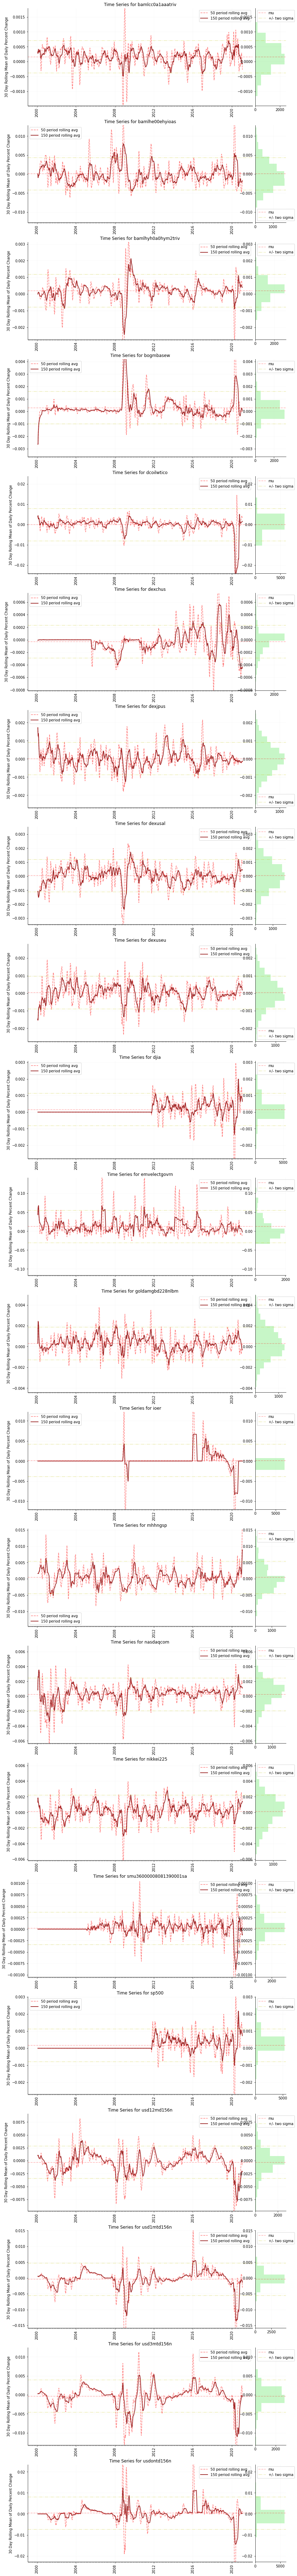

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')


def plot_tseries_over_group_with_histograms(df, xcol, ycol,
                                            grpcol, title_prepend='{}',
                                            labs=None, x_angle=0, labelpad=60,
                                            window=15, ignore_cols=[]):
    '''
    Function for plotting time series df[ycol] over datetime range df[xcol]
    using the unique_grp_vals contained in df[grpcol].unique().

     - df: pd.DataFrame containing datetime and series to plot
     - xcol: str of column name in df for datetime series
     - ycol: str of column name in df for tseries
     - grpcol: str of column name in df of group over which to plot
     - labs: dict of xlab, ylab
     - title_prepend: str containing "{}" that prepends group names in title
     - window: int for calculating rolling means of each series
     - ignore_cols: list of column names not to plot
    '''
    unique_grp_vals = df[grpcol].unique()
    nrows = len(unique_grp_vals) - len(ignore_cols)
    figsize = (13, 6 * nrows)
    fig, axes = plt.subplots(nrows, 1, figsize=figsize)
    title_prepend_hist = 'Histogram of ' + str(title_prepend)
    j = 0
    for i, grp in enumerate(unique_grp_vals):
        _df = df.loc[df[grpcol] == grp]
        if grp not in ignore_cols:
            _df = df.loc[df[grpcol] == grp]
            try:
                ax = axes[j]
                #ax.plot(_df[xcol], _df[ycol], alpha=.2, color='black')
                ax.plot(_df[xcol], _df[ycol].rolling(window=window, min_periods=min(5, window)).mean(),
                        alpha=.5, color='r', label='{} period rolling avg'.format(window),
                        linestyle='--')
                longer_window = int(window * 3)
                ax.plot(_df[xcol], _df[ycol].rolling(window=longer_window, min_periods=5).mean(),
                        alpha=.8, color='darkred', label='{} period rolling avg'.format(longer_window),
                        linewidth=2)
                mu, sigma = _df[ycol].mean(), _df[ycol].std()
                ax.axhline(mu, linestyle='--', color='r', alpha=.3)
                ax.axhline(mu - sigma, linestyle='-.', color='y', alpha=.3)
                ax.axhline(mu + sigma, linestyle='-.', color='y', alpha=.3)
                ax.set_title(title_prepend.format(grp))
                ax.legend(loc='best')
                bottom, top = mu - 3*sigma, mu + 3*sigma
                ax.set_ylim((bottom, top))
                if labs is not None:
                    ax.set_xlabel(labs['xlab'])
                    ax.set_ylabel(labs['ylab'])
                ax.xaxis.labelpad = labelpad
                ax.xaxis.set_minor_locator(months)
                ax.grid(alpha=.1)
                if x_angle != 0:
                    for tick in ax.get_xticklabels():
                        tick.set_rotation(x_angle)

                divider = make_axes_locatable(ax)
                axHisty = divider.append_axes('right', 1.2, pad=0.1, sharey=ax)
                axHisty.grid(alpha=.1)
                axHisty.hist(_df[ycol].dropna(), orientation='horizontal', alpha=.5, color='lightgreen', bins=25)
                axHisty.axhline(mu, linestyle='--', color='r', label='mu', alpha=.3)
                axHisty.axhline(mu - sigma, linestyle='-.', color='y', label='+/- two sigma', alpha=.3)
                axHisty.axhline(mu + sigma, linestyle='-.', color='y', alpha=.3)
                axHisty.legend(loc='best')

                j += 1
            except IndexError:
                pass
        else:
            pass

    sns.set_style("whitegrid")
    sns.despine()
    plt.show()


title_prepend = 'Time Series for {}'
xcol = 'date'
ycol = colname # from the rolling mean of pct change
grpcol = 'variable'
labs = dict(xlab='',
            ylab=str(window)+' Day Rolling Mean of Daily Percent Change')

plot_tseries_over_group_with_histograms(smooth_df,
                                        xcol, ycol, grpcol,
                                        title_prepend, labs,
                                        x_angle=90,
                                        ignore_cols=onehot_cols,
                                        window=50)

Data represesntation in numeric form.

In [ ]:
smooth_df = smooth_df.pivot(index='date',
                            columns='variable',
                            values=colname)
smooth_df.dropna(inplace=True)

smooth_df.head()

variable,bamlcc0a1aaatriv,bamlhe00ehyioas,bamlhyh0a0hym2triv,bogmbasew,dcoilwtico,dexchus,dexjpus,dexusal,dexuseu,djia,emvelectgovrn,goldamgbd228nlbm,ioer,is_holiday,is_holiday_week,is_weekday,mhhngsp,month_august,month_december,month_february,month_january,month_july,month_june,month_march,month_may,month_november,month_october,month_september,nasdaqcom,nikkei225,smu36000008081390001sa,sp500,usd12md156n,usd1mtd156n,usd3mtd156n,usdontd156n,vixcls,vxxlecls,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-31,0.000121,0.000402,-0.000060,-0.002633,0.002913,-0.000008,0.001814,-0.001026,-0.001317,0.0,0.000014,0.000128,0.0,0.0,0.0,1.0,0.003306,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.001322,0.000997,0.0,0.0,0.000754,0.000429,0.000193,0.0,0.002714,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-02-01,0.000210,0.000588,-0.000057,-0.002633,0.003673,-0.000010,0.001920,-0.001376,-0.001406,0.0,0.000000,0.000198,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000377,0.000798,0.0,0.0,0.000884,0.000542,0.000268,0.0,0.000710,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-02-02,0.000333,0.000465,-0.000057,-0.002633,0.002777,-0.000010,0.002146,-0.001138,-0.001279,0.0,0.072329,0.000134,0.0,0.0,0.0,1.0,0.001629,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000196,0.001065,0.0,0.0,0.000951,0.000648,0.000316,0.0,0.000241,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-02-03,0.000459,-0.000416,0.000022,-0.002633,0.003673,-0.000007,0.001543,-0.000850,-0.001379,0.0,0.072329,0.000387,0.0,0.0,0.0,1.0,0.001629,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002776,0.001418,0.0,0.0,0.001056,0.000493,0.000303,0.0,-0.005215,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-02-04,0.000533,-0.000725,0.000105,-0.002633,0.005344,-0.000004,0.001206,-0.001165,-0.001891,0.0,0.072329,0.000644,0.0,0.0,0.0,1.0,0.001629,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003245,0.002187,0.0,0.0,0.001066,0.000558,0.000331,0.0,-0.005186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Correlation matrix plot and heat map generation.

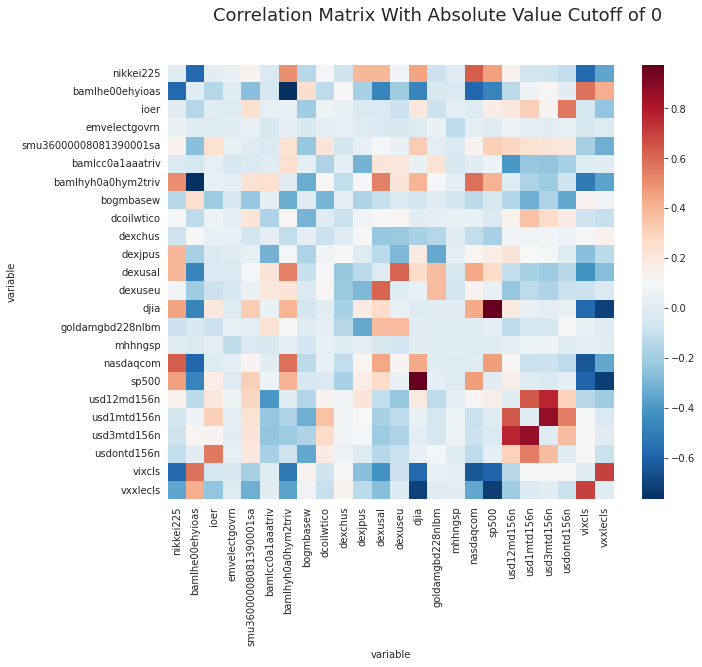

variable,nikkei225,bamlhe00ehyioas,ioer,emvelectgovrn,smu36000008081390001sa,bamlcc0a1aaatriv,bamlhyh0a0hym2triv,bogmbasew,dcoilwtico,dexchus,dexjpus,dexusal,dexuseu,djia,goldamgbd228nlbm,mhhngsp,nasdaqcom,sp500,usd12md156n,usd1mtd156n,usd3mtd156n,usdontd156n,vixcls,vxxlecls
variable,,,,,,,,,,,,,,,,,,,,,,,,
nikkei225,0.000000,-0.576764,0.008725,0.045216,0.141807,-0.030508,0.511356,-0.134587,0.087797,-0.076714,0.394471,0.392885,0.072230,0.456382,-0.086308,-0.007059,0.630498,0.458755,0.151231,-0.061754,-0.067765,-0.113425,-0.574397,-0.351890
bamlhe00ehyioas,-0.576764,0.000000,-0.143796,-0.003083,-0.260531,-0.046274,-0.766973,0.250695,-0.122186,0.108062,-0.182274,-0.473316,-0.207174,-0.470659,-0.031907,-0.024986,-0.586146,-0.476461,-0.133585,0.051360,0.119068,0.004415,0.579041,0.422907
ioer,0.008725,-0.143796,0.000000,-0.007215,0.245223,0.027311,0.029024,-0.205242,0.060116,0.034805,-0.026372,-0.028275,-0.083012,0.196480,-0.081316,0.011754,-0.015699,0.168144,0.193654,0.310788,0.125867,0.566795,-0.048404,-0.241321
emvelectgovrn,0.045216,-0.003083,-0.007215,0.000000,0.031807,-0.039934,0.021213,-0.034554,0.015037,0.031869,-0.010160,-0.020118,-0.044637,-0.007822,0.049241,-0.115123,0.022242,-0.008903,0.057073,0.009336,0.006571,0.023538,-0.043909,-0.013358
smu36000008081390001sa,0.141807,-0.260531,0.245223,0.031807,0.000000,-0.020030,0.235103,-0.225733,0.218364,-0.060507,0.024682,0.094163,0.044234,0.325724,0.013343,-0.029704,0.129490,0.309734,0.294560,0.226929,0.219629,0.197356,-0.186831,-0.321553
bamlcc0a1aaatriv,-0.030508,-0.046274,0.027311,-0.039934,-0.020030,0.000000,0.244777,0.022541,-0.166062,0.018461,-0.308104,0.213252,0.204881,0.045815,0.229571,-0.038930,0.004183,0.055227,-0.402962,-0.232809,-0.236381,-0.182298,-0.014548,0.005184
bamlhyh0a0hym2triv,0.511356,-0.766973,0.029024,0.021213,0.235103,0.244777,0.000000,-0.330255,0.115840,-0.109391,0.084719,0.543211,0.214000,0.399372,0.097375,0.016464,0.583167,0.405106,-0.007319,-0.166193,-0.214488,-0.074746,-0.520229,-0.362820
bogmbasew,-0.134587,0.250695,-0.205242,-0.034554,-0.225733,0.022541,-0.330255,0.000000,-0.299331,0.016690,-0.162071,-0.094011,-0.021535,-0.057557,0.000173,-0.052738,-0.132195,-0.040911,-0.154369,-0.319293,-0.165705,-0.350399,0.143585,0.065724
dcoilwtico,0.087797,-0.122186,0.060116,0.015037,0.218364,-0.166062,0.115840,-0.299331,0.000000,-0.083467,0.071308,0.093565,0.113106,0.005107,0.018184,0.035253,0.029673,-0.024835,0.136226,0.361386,0.269004,0.174876,-0.069423,-0.098595


In [ ]:
viz_cols = ['nikkei225', 'bamlhe00ehyioas', 'ioer', 'emvelectgovrn', 'smu36000008081390001sa','bamlcc0a1aaatriv', 'bamlhyh0a0hym2triv', 'bogmbasew', 'dcoilwtico',
           'dexchus', 'dexjpus', 'dexusal', 'dexuseu', 'djia', 'goldamgbd228nlbm',
           'mhhngsp', 'nasdaqcom', 'sp500', 'usd12md156n', 'usd1mtd156n',
           'usd3mtd156n', 'usdontd156n', 'vixcls', 'vxxlecls']

def correlation_heatmap(df, cutoff=None, title=''):
    df_corr = df.corr('pearson')
    np.fill_diagonal(df_corr.values, 0)
    if cutoff != None:
        for col in df_corr.columns:
            df_corr.loc[df_corr[col].abs() <= cutoff, col] = 0
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(df_corr, ax=ax, cmap='RdBu_r')
    plt.suptitle(title, size=18)
    plt.show()
    return df_corr


cutoff = 0
correlation_heatmap(smooth_df[viz_cols],
                    cutoff, 'Correlation Matrix With Absolute Value Cutoff of {}'.format(cutoff))

y is used for test and x is used for train. For future prediction, we need to shift y value.

split and scale.

In [ ]:
# specify y column name
y_col = 'dcoilwtico' #daily oil price

# map the values to the corresponding dates in the moving averages dataset
y_dict = econ_df[y_col].to_dict()
smooth_df[y_col] = smooth_df.index.values
smooth_df[y_col] = smooth_df[y_col].map(y_dict)

# shift back -window so we are predicting +window in future
smooth_df[y_col] = smooth_df[y_col].shift(-window)
smooth_df.dropna(inplace=True)

# write to disk
# fname = './data/smooth_df_'+str(window)+'_mean.csv'
# smooth_df.to_csv(fname)
data['smooth_df'] = smooth_df
smooth_df.head()

variable,bamlcc0a1aaatriv,bamlhe00ehyioas,bamlhyh0a0hym2triv,bogmbasew,dcoilwtico,dexchus,dexjpus,dexusal,dexuseu,djia,emvelectgovrn,goldamgbd228nlbm,ioer,is_holiday,is_holiday_week,is_weekday,mhhngsp,month_august,month_december,month_february,month_january,month_july,month_june,month_march,month_may,month_november,month_october,month_september,nasdaqcom,nikkei225,smu36000008081390001sa,sp500,usd12md156n,usd1mtd156n,usd3mtd156n,usdontd156n,vixcls,vxxlecls,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-31,0.000121,0.000402,-0.000060,-0.002633,31.71,-0.000008,0.001814,-0.001026,-0.001317,0.0,0.000014,0.000128,0.0,0.0,0.0,1.0,0.003306,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.001322,0.000997,0.0,0.0,0.000754,0.000429,0.000193,0.0,0.002714,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-02-01,0.000210,0.000588,-0.000057,-0.002633,31.51,-0.000010,0.001920,-0.001376,-0.001406,0.0,0.000000,0.000198,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000377,0.000798,0.0,0.0,0.000884,0.000542,0.000268,0.0,0.000710,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-02-02,0.000333,0.000465,-0.000057,-0.002633,31.46,-0.000010,0.002146,-0.001138,-0.001279,0.0,0.072329,0.000134,0.0,0.0,0.0,1.0,0.001629,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000196,0.001065,0.0,0.0,0.000951,0.000648,0.000316,0.0,0.000241,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-02-03,0.000459,-0.000416,0.000022,-0.002633,32.19,-0.000007,0.001543,-0.000850,-0.001379,0.0,0.072329,0.000387,0.0,0.0,0.0,1.0,0.001629,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002776,0.001418,0.0,0.0,0.001056,0.000493,0.000303,0.0,-0.005215,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-02-04,0.000533,-0.000725,0.000105,-0.002633,32.19,-0.000004,0.001206,-0.001165,-0.001891,0.0,0.072329,0.000644,0.0,0.0,0.0,1.0,0.001629,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003245,0.002187,0.0,0.0,0.001066,0.000558,0.000331,0.0,-0.005186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Prepocessrocess data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def split_scale(df, X_cols, y_col, norm_cols=None, train_size=.7):
    X = df[X_cols]
    Y = df[y_col]
    xtrain, xtest, ytrain, ytest = train_test_split(X, Y, train_size=train_size)
    std = StandardScaler()
    if norm_cols is not None:
        std.fit(xtrain[norm_cols])
        xtrain[norm_cols] = std.transform(xtrain[norm_cols])
        xtest[norm_cols] = std.transform(xtest[norm_cols])
        xtrain, xtest = xtrain.values, xtest.values
    else:
        std.fit(xtrain)
        xtrain = std.transform(xtrain)
        xtest = std.transform(xtest)

    return xtrain, ytrain, xtest, ytest

norm_cols = [col for col in smooth_df.columns if col not in onehot_cols+[y_col]]
X_cols = [col for col in smooth_df.columns if col != y_col]
X_train, y_train, X_test, y_test = split_scale(smooth_df,
                                               X_cols, y_col,
                                               norm_cols=norm_cols,
                                               train_size=.7)

split off 50% data for final testing.

In [ ]:
# split test set to val and test
cutoff_ix = X_test.shape[0] // 2
X_val, y_val = X_test[:cutoff_ix], y_test[:cutoff_ix]
X_test, y_test = X_test[cutoff_ix:], y_test[cutoff_ix:]

Calculate loss and plotting loss using loss function.

In [ ]:
import numpy as np
import pandas as pd
import keras
import time # add decorator to time functions
from functools import wraps # add decorator to time functions
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


def plot_loss(history_obj, width=5, height=3):
    '''
    Leans on Keras' history.history object to visualize fit of model.
    '''
    plt.clf()
    loss = history_obj['loss']
    val_loss = history_obj['val_loss']
    d_loss = np.subtract(loss, val_loss)
    epochs = range(1, len(loss)+1)
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(5, 3))
    ax.plot(epochs, loss, 'g', label='Training Loss', linestyle='--')
    ax.plot(epochs, val_loss, 'b', label='Validation Loss', linestyle='-.')
    # ax.set_title('Training & Validation Loss')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.grid(alpha=0.3)
    ax.legend(loc='best')
    sns.despine()
    plt.suptitle('Training vs. Validation of Sequential Network Model Over Various Epochs')

    fig2, ax2 = plt.subplots(figsize=(5, 3))
    ax2.plot(epochs, d_loss, c='black', label='train loss - val loss')
    ax2.grid(alpha=0.3)
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss Differential (Train-Val)')
    ax2.legend(loc='best')
    ax2.axhline(0, c='black', linestyle=':')
    ax2.set_title('Difference of Curves Above')

    sns.despine()
    plt.show()
    return None

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12411129576391914432
]


In [ ]:
# econ_df.isnull().sum()

In [ ]:
# !pip install tf-nightly
# !pip install --upgrade protobuf

Perform grid search on hyperparameter. A simple_feedforward_model function makes it easier to generate a simple densely connected model that enables various values for regularization, dropout, number of layers, and number of units per layer. It could also be used, although it was not in this case, to vary the loss function, activation function, and optimizer.

Next a range of parameters are identified for reg, dropout, num_neurons, and num_dense_layers. These ranges are then iterated over, such that all permutations are accounted for, and a model with the iteration's specifications is created, trained and tested. Keras' callback EarlyStopping is used with patience=1 in order to stop training models after convergence has occurred.

As the grid search is performed the results of each model are saved into a Python dictionary called model_dict for analysis.

Epoch 00263: early stopping
Model ID: 001_0.005_0.0_2_16
--------------------------------------------------------------------------------
R-squared on training data = 0.8123
R-squared on validation data = 0.8162
R-squared on testing data = 0.8013
--------------------------------------------------------------------------------
RMSE on training data = 11.3362
RMSE on validation data = 11.6126
RMSE on testing data = 11.4379
--------------------------------------------------------------------------------

                    Model # 1
                    Fully Connected Model w/ Dropout & Regularization 
                     - Regularizer Rate:    0.0050000
                     - Dropout Rate:        0.000
                     - Number Dense Layers: 1
                     - Neurons per Layer:   16
                     



<Figure size 432x288 with 0 Axes>

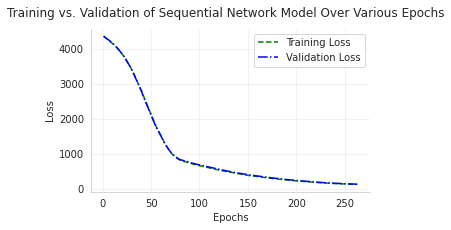

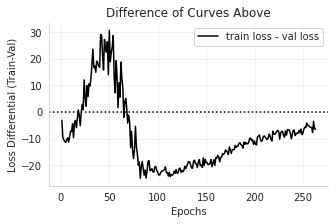

Epoch 00233: early stopping
Model ID: 002_0.001_0.0_2_16
--------------------------------------------------------------------------------
R-squared on training data = 0.8126
R-squared on validation data = 0.8207
R-squared on testing data = 0.8040
--------------------------------------------------------------------------------
RMSE on training data = 11.3289
RMSE on validation data = 11.4712
RMSE on testing data = 11.3609
--------------------------------------------------------------------------------

                    Model # 2
                    Fully Connected Model w/ Dropout & Regularization 
                     - Regularizer Rate:    0.0010000
                     - Dropout Rate:        0.000
                     - Number Dense Layers: 1
                     - Neurons per Layer:   16
                     



<Figure size 432x288 with 0 Axes>

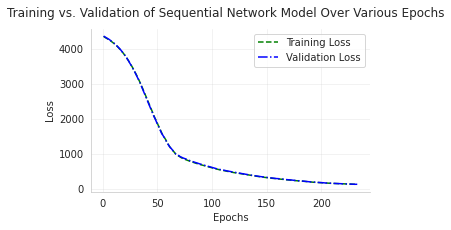

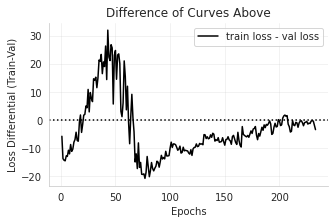

Epoch 00256: early stopping
Model ID: 003_0.0005_0.0_2_16
--------------------------------------------------------------------------------
R-squared on training data = 0.8313
R-squared on validation data = 0.8335
R-squared on testing data = 0.8168
--------------------------------------------------------------------------------
RMSE on training data = 10.7472
RMSE on validation data = 11.0519
RMSE on testing data = 10.9822
--------------------------------------------------------------------------------

                    Model # 3
                    Fully Connected Model w/ Dropout & Regularization 
                     - Regularizer Rate:    0.0005000
                     - Dropout Rate:        0.000
                     - Number Dense Layers: 1
                     - Neurons per Layer:   16
                     



<Figure size 432x288 with 0 Axes>

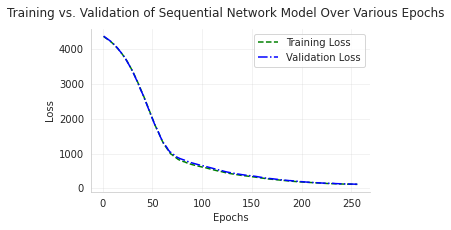

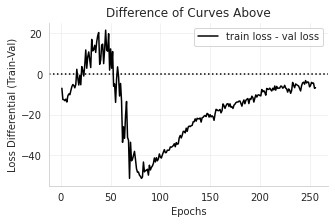

Epoch 00282: early stopping
Model ID: 004_0.005_0.05_2_16
--------------------------------------------------------------------------------
R-squared on training data = 0.8039
R-squared on validation data = 0.8013
R-squared on testing data = 0.7936
--------------------------------------------------------------------------------
RMSE on training data = 11.5865
RMSE on validation data = 12.0750
RMSE on testing data = 11.6566
--------------------------------------------------------------------------------
Epoch 00217: early stopping
Model ID: 005_0.001_0.05_2_16
--------------------------------------------------------------------------------
R-squared on training data = 0.7772
R-squared on validation data = 0.7827
R-squared on testing data = 0.7627
--------------------------------------------------------------------------------
RMSE on training data = 12.3523
RMSE on validation data = 12.6286
RMSE on testing data = 12.4995
-------------------------------------------------------------------

<Figure size 432x288 with 0 Axes>

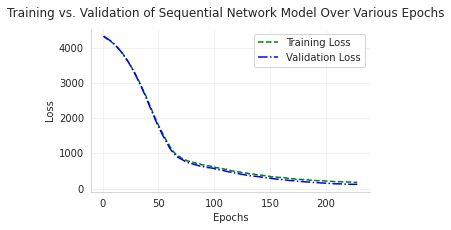

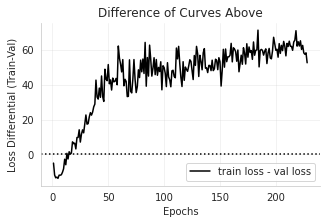

Epoch 00185: early stopping
Model ID: 011_0.001_0.15_2_16
--------------------------------------------------------------------------------
R-squared on training data = 0.7145
R-squared on validation data = 0.7206
R-squared on testing data = 0.6957
--------------------------------------------------------------------------------
RMSE on training data = 13.9830
RMSE on validation data = 14.3172
RMSE on testing data = 14.1554
--------------------------------------------------------------------------------
Epoch 00207: early stopping
Model ID: 012_0.0005_0.15_2_16
--------------------------------------------------------------------------------
R-squared on training data = 0.6432
R-squared on validation data = 0.6454
R-squared on testing data = 0.6288
--------------------------------------------------------------------------------
RMSE on training data = 15.6306
RMSE on validation data = 16.1315
RMSE on testing data = 15.6345
------------------------------------------------------------------

<Figure size 432x288 with 0 Axes>

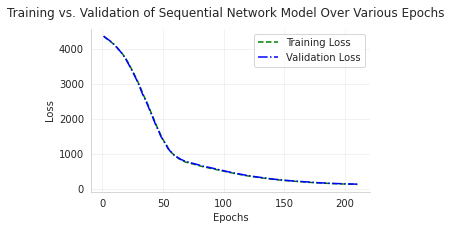

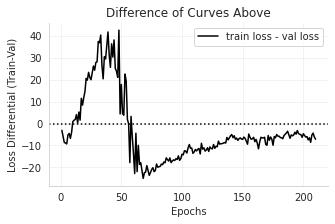

Epoch 00202: early stopping
Model ID: 064_0.005_0.05_2_22
--------------------------------------------------------------------------------
R-squared on training data = 0.7958
R-squared on validation data = 0.8019
R-squared on testing data = 0.7827
--------------------------------------------------------------------------------
RMSE on training data = 11.8257
RMSE on validation data = 12.0566
RMSE on testing data = 11.9631
--------------------------------------------------------------------------------
Epoch 00187: early stopping
Model ID: 065_0.001_0.05_2_22
--------------------------------------------------------------------------------
R-squared on training data = 0.7347
R-squared on validation data = 0.7355
R-squared on testing data = 0.7179
--------------------------------------------------------------------------------
RMSE on training data = 13.4773
RMSE on validation data = 13.9323
RMSE on testing data = 13.6298
-------------------------------------------------------------------

<Figure size 432x288 with 0 Axes>

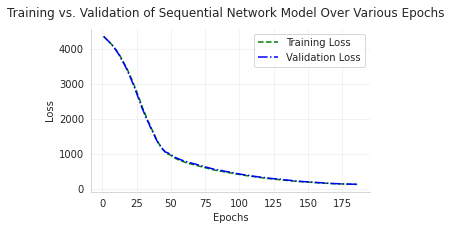

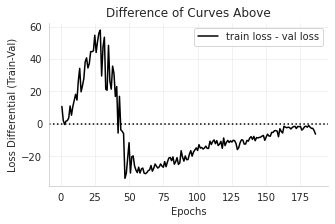

Epoch 00150: early stopping
Model ID: 123_0.0005_0.0_2_28
--------------------------------------------------------------------------------
R-squared on training data = 0.6981
R-squared on validation data = 0.7016
R-squared on testing data = 0.6755
--------------------------------------------------------------------------------
RMSE on training data = 14.3790
RMSE on validation data = 14.7968
RMSE on testing data = 14.6181
--------------------------------------------------------------------------------
Epoch 00181: early stopping
Model ID: 124_0.005_0.05_2_28
--------------------------------------------------------------------------------
R-squared on training data = 0.8141
R-squared on validation data = 0.8185
R-squared on testing data = 0.8057
--------------------------------------------------------------------------------
RMSE on training data = 11.2829
RMSE on validation data = 11.5388
RMSE on testing data = 11.3105
-------------------------------------------------------------------

<Figure size 432x288 with 0 Axes>

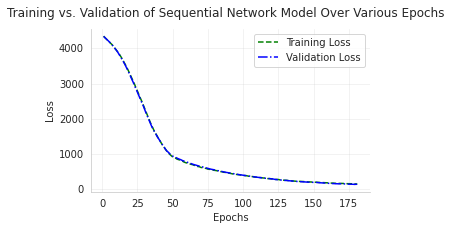

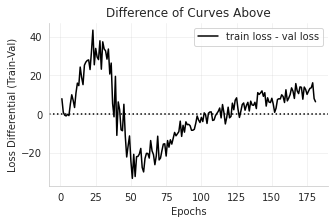

Epoch 00192: early stopping
Model ID: 125_0.001_0.05_2_28
--------------------------------------------------------------------------------
R-squared on training data = 0.8280
R-squared on validation data = 0.8316
R-squared on testing data = 0.8192
--------------------------------------------------------------------------------
RMSE on training data = 10.8539
RMSE on validation data = 11.1155
RMSE on testing data = 10.9113
--------------------------------------------------------------------------------

                    Model # 125
                    Fully Connected Model w/ Dropout & Regularization 
                     - Regularizer Rate:    0.0010000
                     - Dropout Rate:        0.050
                     - Number Dense Layers: 1
                     - Neurons per Layer:   28
                     



<Figure size 432x288 with 0 Axes>

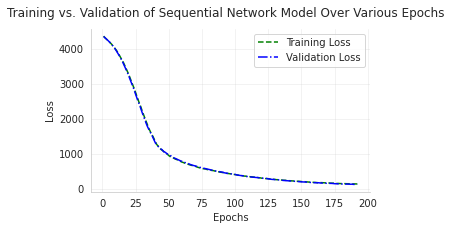

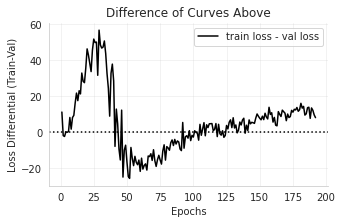

Epoch 00176: early stopping
Model ID: 126_0.0005_0.05_2_28
--------------------------------------------------------------------------------
R-squared on training data = 0.7776
R-squared on validation data = 0.7794
R-squared on testing data = 0.7648
--------------------------------------------------------------------------------
RMSE on training data = 12.3408
RMSE on validation data = 12.7216
RMSE on testing data = 12.4452
--------------------------------------------------------------------------------
Epoch 00140: early stopping
Model ID: 127_0.005_0.1_2_28
--------------------------------------------------------------------------------
R-squared on training data = 0.7116
R-squared on validation data = 0.7112
R-squared on testing data = 0.6956
--------------------------------------------------------------------------------
RMSE on training data = 14.0519
RMSE on validation data = 14.5576
RMSE on testing data = 14.1587
-------------------------------------------------------------------

<Figure size 432x288 with 0 Axes>

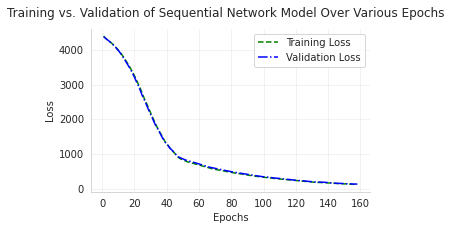

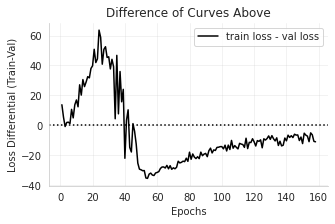

Epoch 00156: early stopping
Model ID: 184_0.005_0.05_2_34
--------------------------------------------------------------------------------
R-squared on training data = 0.8210
R-squared on validation data = 0.8260
R-squared on testing data = 0.8095
--------------------------------------------------------------------------------
RMSE on training data = 11.0708
RMSE on validation data = 11.2991
RMSE on testing data = 11.1986
--------------------------------------------------------------------------------

                    Model # 184
                    Fully Connected Model w/ Dropout & Regularization 
                     - Regularizer Rate:    0.0050000
                     - Dropout Rate:        0.050
                     - Number Dense Layers: 1
                     - Neurons per Layer:   34
                     



<Figure size 432x288 with 0 Axes>

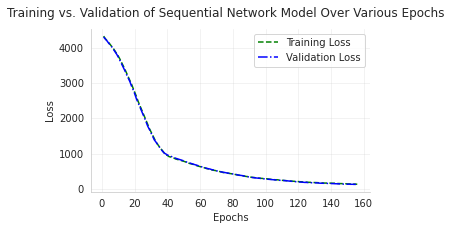

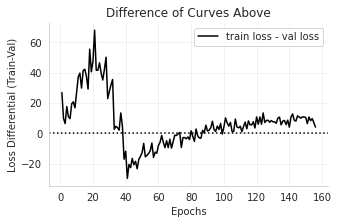

Epoch 00142: early stopping
Model ID: 185_0.001_0.05_2_34
--------------------------------------------------------------------------------
R-squared on training data = 0.7839
R-squared on validation data = 0.7858
R-squared on testing data = 0.7773
--------------------------------------------------------------------------------
RMSE on training data = 12.1654
RMSE on validation data = 12.5356
RMSE on testing data = 12.1090
--------------------------------------------------------------------------------
Epoch 00156: early stopping
Model ID: 186_0.0005_0.05_2_34
--------------------------------------------------------------------------------
R-squared on training data = 0.7937
R-squared on validation data = 0.7970
R-squared on testing data = 0.7787
--------------------------------------------------------------------------------
RMSE on training data = 11.8867
RMSE on validation data = 12.2053
RMSE on testing data = 12.0711
------------------------------------------------------------------

<Figure size 432x288 with 0 Axes>

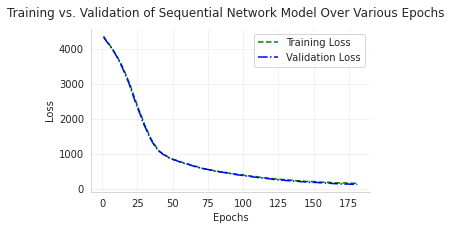

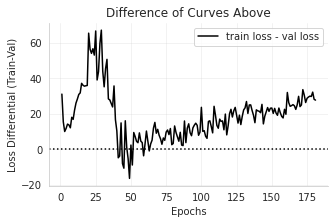

Epoch 00151: early stopping
Model ID: 188_0.001_0.1_2_34
--------------------------------------------------------------------------------
R-squared on training data = 0.7955
R-squared on validation data = 0.7978
R-squared on testing data = 0.7798
--------------------------------------------------------------------------------
RMSE on training data = 11.8323
RMSE on validation data = 12.1817
RMSE on testing data = 12.0418
--------------------------------------------------------------------------------
Epoch 00165: early stopping
Model ID: 189_0.0005_0.1_2_34
--------------------------------------------------------------------------------
R-squared on training data = 0.8192
R-squared on validation data = 0.8250
R-squared on testing data = 0.8087
--------------------------------------------------------------------------------
RMSE on training data = 11.1265
RMSE on validation data = 11.3332
RMSE on testing data = 11.2248
--------------------------------------------------------------------

<Figure size 432x288 with 0 Axes>

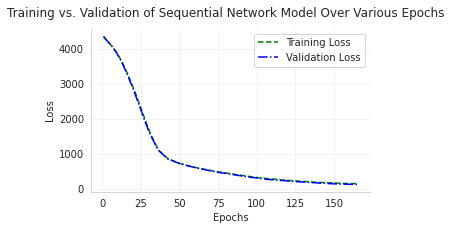

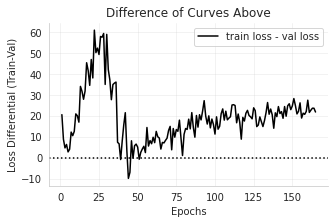

Epoch 00145: early stopping
Model ID: 190_0.005_0.15_2_34
--------------------------------------------------------------------------------
R-squared on training data = 0.8049
R-squared on validation data = 0.8101
R-squared on testing data = 0.7951
--------------------------------------------------------------------------------
RMSE on training data = 11.5573
RMSE on validation data = 11.8054
RMSE on testing data = 11.6160
--------------------------------------------------------------------------------
Epoch 00158: early stopping
Model ID: 191_0.001_0.15_2_34
--------------------------------------------------------------------------------
R-squared on training data = 0.7767
R-squared on validation data = 0.7854
R-squared on testing data = 0.7604
--------------------------------------------------------------------------------
RMSE on training data = 12.3663
RMSE on validation data = 12.5473
RMSE on testing data = 12.5616
-------------------------------------------------------------------

<Figure size 432x288 with 0 Axes>

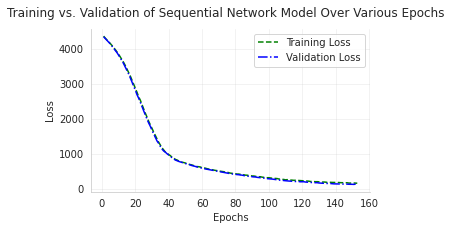

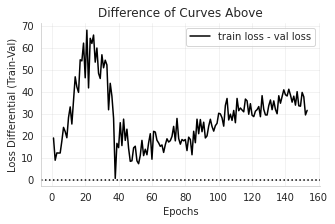

Epoch 00150: early stopping
Model ID: 193_0.005_0.2_2_34
--------------------------------------------------------------------------------
R-squared on training data = 0.7679
R-squared on validation data = 0.7692
R-squared on testing data = 0.7544
--------------------------------------------------------------------------------
RMSE on training data = 12.6075
RMSE on validation data = 13.0134
RMSE on testing data = 12.7163
--------------------------------------------------------------------------------
Epoch 00124: early stopping
Model ID: 194_0.001_0.2_2_34
--------------------------------------------------------------------------------
R-squared on training data = 0.6126
R-squared on validation data = 0.6176
R-squared on testing data = 0.5877
--------------------------------------------------------------------------------
RMSE on training data = 16.2874
RMSE on validation data = 16.7510
RMSE on testing data = 16.4777
---------------------------------------------------------------------

<Figure size 432x288 with 0 Axes>

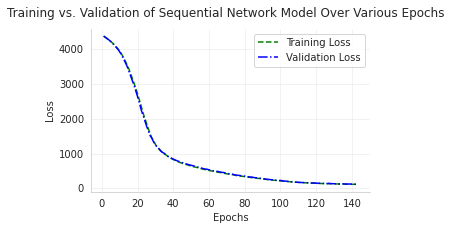

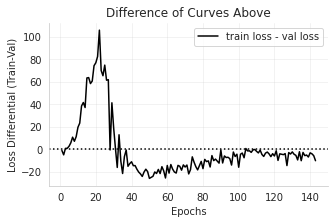

Epoch 00110: early stopping
Model ID: 303_0.0005_0.0_3_22
--------------------------------------------------------------------------------
R-squared on training data = 0.6620
R-squared on validation data = 0.6552
R-squared on testing data = 0.6335
--------------------------------------------------------------------------------
RMSE on training data = 15.2130
RMSE on validation data = 15.9061
RMSE on testing data = 15.5352
--------------------------------------------------------------------------------
Epoch 00084: early stopping
Model ID: 304_0.005_0.05_3_22
--------------------------------------------------------------------------------
R-squared on training data = 0.5381
R-squared on validation data = 0.5475
R-squared on testing data = 0.5273
--------------------------------------------------------------------------------
RMSE on training data = 17.7849
RMSE on validation data = 18.2210
RMSE on testing data = 17.6425
-------------------------------------------------------------------

In [ ]:
#Model_FNN
import tensorflow as tf
# from keras import backend as K
from tensorflow.python.keras import backend as K
import gc
K.clear_session()

# config = tf.compat.v1.ConfigProto
# config.gpu_options.allow_growth=True
# sess = tf.Session(config=config)
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)
K.set_session(sess)


from keras.models import *
from keras.layers import *
from keras.regularizers import *
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.callbacks import EarlyStopping

def simple_feedforward_model(num_neurons, num_dense_layers, reg=.001,
                            loss='mse', #test later mean_squared_logarithmic_error
                            activation='relu', optimizer='rmsprop',
                            metrics=None, dropout=.5, verbose=0):
    model = Sequential()
    model.add(Dense(num_neurons, activation=activation,
                    input_shape=(X_train.shape[1], ),
                    kernel_regularizer=l2(reg),
                    activity_regularizer=l1(reg)))

    for lyr in range(num_dense_layers):
        model.add(Dense(num_neurons,
                        activation=activation,
                        kernel_regularizer=l2(reg),
                        activity_regularizer=l1(reg)))
        model.add(Dropout(dropout))

    model.add(Dense(1))

    if verbose: model.summary()

    model.compile(optimizer=optimizer,
                 loss=loss,
                 metrics=metrics)

    return model

# instantiate model & run
epochs = 1000
num_batches = 4
batch_size = X_train.shape[0] // num_batches
verbose = 0
patience = 2

dropout_rates = np.arange(0, 1, .05)
n_units_per_layer = np.arange(16, 37, 6)
n_dense_layers = np.arange(1, 3, 1)
regularizer_range = [.005, .001, .0005]
r2_cutoff = 0.8

model_dict = dict()
model_number = 1
for layers in n_dense_layers:
    for units in n_units_per_layer:
        for dropout in dropout_rates:
            for reg in regularizer_range:
                # define feed forward model with parameters of CV
                model = simple_feedforward_model(units, layers, reg,
                                                 dropout=dropout)

                # use early stopping to ensure the model doesn't go too far
                # or waste time training un-fit models
                early_stopping = EarlyStopping(patience=patience,
                                              monitor='val_loss',
                                              min_delta=.0001,
                                              verbose=1,
                                              mode='auto')

                model_name = '''
                    Model # %i
                    Fully Connected Model w/ Dropout & Regularization
                     - Regularizer Rate:    %.7f
                     - Dropout Rate:        %.3f
                     - Number Dense Layers: %i
                     - Neurons per Layer:   %i
                    '''%(model_number, reg, dropout, layers, units)

                history = model.fit(X_train, y_train,
                                   epochs=epochs,
                                   batch_size=batch_size,
                                   verbose=verbose,
                                   validation_data=(X_val, y_val),
                                   callbacks=[early_stopping])

                #r-squard
                test_pred = model.predict(X_test)
                test_r2 = r2_score(y_test, test_pred)
                val_pred = model.predict(X_val)
                val_r2 = r2_score(y_val, val_pred)
                train_pred = model.predict(X_train)
                train_r2 = r2_score(y_train, train_pred)

                #root_mean_squared_error
                test_pred2 = model.predict(X_test)
                test_rmse =  np.sqrt(mean_squared_error(y_test, test_pred))
                val_pred2 = model.predict(X_val)
                val_rmse =  np.sqrt(mean_squared_error(y_val, val_pred))
                train_pred2 = model.predict(X_train)
                train_rmse =  np.sqrt(mean_squared_error(y_train, train_pred))

                actual_layers = layers + 1
                model_id = str(model_number).zfill(3)+'_'+str(reg)+'_'+str(round(dropout, 2))+'_'+str(actual_layers)+'_'+str(units)
                print('Model ID: {}'.format(model_id))
                print('-'*80)
                print('R-squared on training data = %.4f' % train_r2)
                print('R-squared on validation data = %.4f' % val_r2)
                print('R-squared on testing data = %.4f' % test_r2)
                print('-'*80)
                print('RMSE on training data = %.4f' % train_rmse)
                print('RMSE on validation data = %.4f' % val_rmse)
                print('RMSE on testing data = %.4f' % test_rmse)
                print('-'*80)

                # only print data on reasonable models
                if test_r2 > r2_cutoff:
                    model_dict[model_id] = {'model_number': model_number,
                                           'model_id': model_name,
                                           'model': model,
                                           'r2_test': test_r2,
                                           'r2_val': val_r2,
                                           'r2_train': train_r2,

                                           'rmse_test': test_rmse,
                                           'rmse_val': val_rmse,
                                           'rmse_train': train_rmse,

                                            'history': history.history,
                                           'units': units,
                                           'layers': actual_layers,
                                           'epochs': epochs,
                                           'dropout': dropout,
                                           'regularizer': reg}
                    print(model_name, '\n')
                    plot_loss(history.history)
                else:
                    model_dict[model_id] = {'model_number': model_number,
                       'model_id': model_name,
                       'model': model,
                       'r2_test': test_r2,
                       'r2_val': val_r2,
                       'r2_train': train_r2,

                        'rmse_test': test_rmse,
                       'rmse_val': val_rmse,
                       'rmse_train': train_rmse,

                       'history': None,
                       'units': units,
                       'layers': actual_layers,
                       'epochs': epochs,
                       'dropout': dropout,
                       'regularizer': reg}
                    pass

                model_number += 1

Compile the model and find from grid search.

In [ ]:
model_df = pd.DataFrame.from_dict(model_dict).T
keep_cols = ['units', 'layers', 'dropout', 'regularizer',
            'r2_train', 'r2_val', 'r2_test','rmse_train', 'rmse_val', 'rmse_test']
model_df = model_df[keep_cols]
model_df.head()

,units,layers,dropout,regularizer,r2_train,r2_val,r2_test,rmse_train,rmse_val,rmse_test
001_0.005_0.0_2_16,16,2,0,0.005,0.812327,0.816218,0.801319,11.3362,11.6126,11.4379
002_0.001_0.0_2_16,16,2,0,0.001,0.812567,0.820667,0.803985,11.3289,11.4712,11.3609
003_0.0005_0.0_2_16,16,2,0,0.0005,0.831322,0.833536,0.816834,10.7472,11.0519,10.9822
004_0.005_0.05_2_16,16,2,0.05,0.005,0.803949,0.801291,0.793648,11.5865,12.075,11.6566
005_0.001_0.05_2_16,16,2,0.05,0.001,0.777177,0.782655,0.762726,12.3523,12.6286,12.4995


Test, train and validation for R-squared.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f77276150>,
      dtype=object)

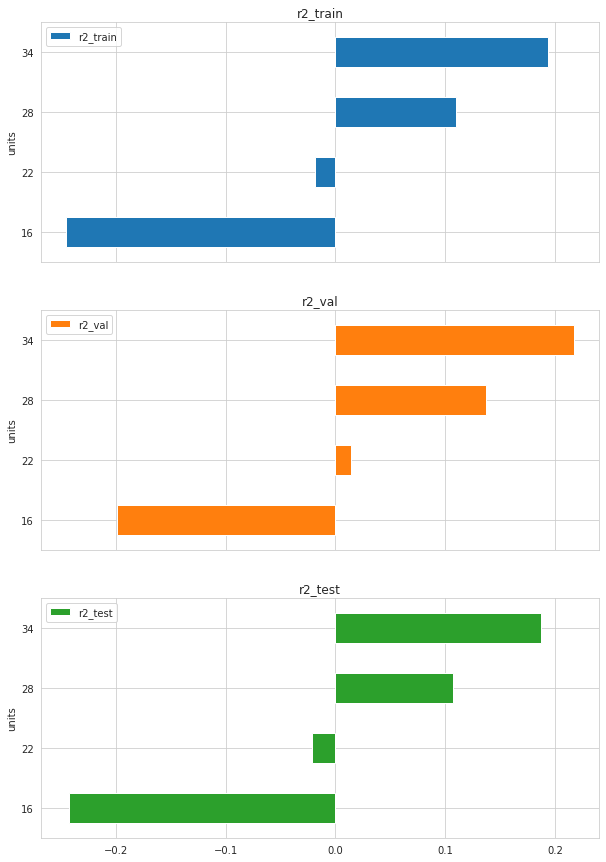

In [ ]:
r2_cols = ['r2_train', 'r2_val', 'r2_test']
model_df[r2_cols] = model_df[r2_cols].astype(np.float32)
model_df.groupby(['units'])[r2_cols].mean().plot(kind='barh', subplots=True,
                                                figsize=(10, 15))

Test, train and validation for RMSE.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c5aacab50>,
      dtype=object)

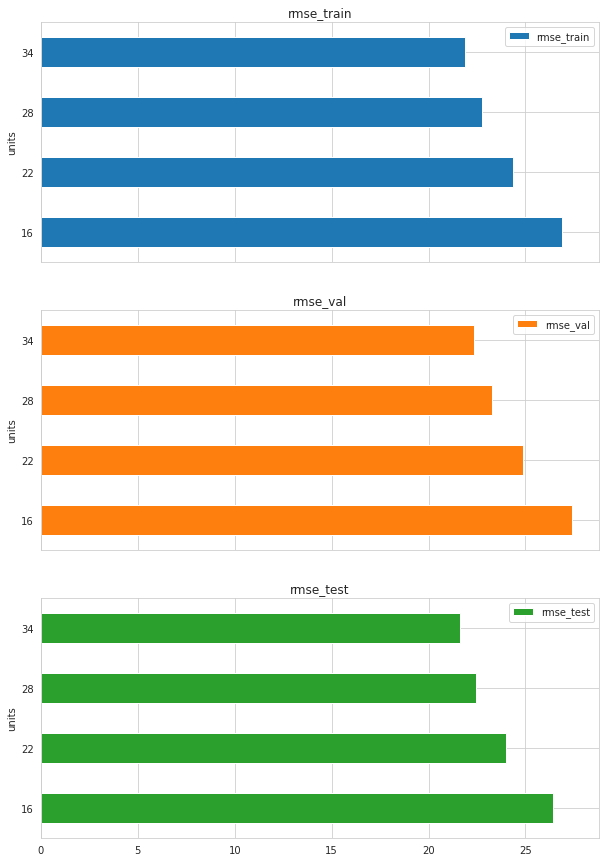

In [ ]:
rmse_cols = ['rmse_train', 'rmse_val', 'rmse_test']
model_df[rmse_cols] = model_df[rmse_cols].astype(np.float32)
model_df.groupby(['units'])[rmse_cols].mean().plot(kind='barh', subplots=True,
                                                figsize=(10, 15))

Find the best model result.

<Figure size 432x288 with 0 Axes>

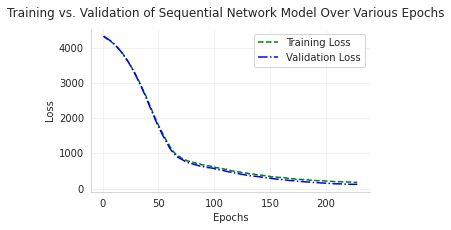

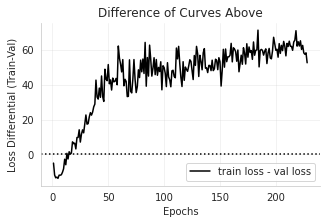

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 16)                992       
_________________________________________________________________
dense_28 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_9 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 17        
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


units                16
layers                2
dropout            0.15
regularizer       0.005
r2_train       0.833399
r2_val         0.837068
r2_test        0.826041
rmse_train      10.6808
rmse_val        10.9341
rmse_test       10.7027
Name: 010_0.005_0.15_2_16, dtype: object

In [ ]:
best_model_ix = model_df['r2_test'].idxmax()
best_model = model_dict[best_model_ix]['model']
plot_loss(model_dict[best_model_ix]['history'])
# plt.savefig('./figs/best_model_loss.png')
best_model.summary()
model_df.loc[best_model_ix]

In [ ]:
best_model.save('BEST_MODEL.h5')

<Figure size 432x288 with 0 Axes>

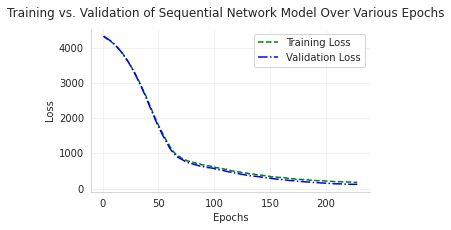

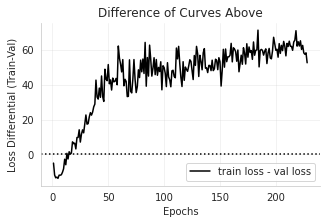

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 16)                992       
_________________________________________________________________
dense_28 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_9 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 17        
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


units                16
layers                2
dropout            0.15
regularizer       0.005
r2_train       0.833399
r2_val         0.837068
r2_test        0.826041
rmse_train      10.6808
rmse_val        10.9341
rmse_test       10.7027
Name: 010_0.005_0.15_2_16, dtype: object

In [ ]:
best_model_ix = model_df['rmse_test'].idxmin()
best_model = model_dict[best_model_ix]['model']
plot_loss(model_dict[best_model_ix]['history'])
# plt.savefig('./figs/best_model_loss.png')
best_model.summary()
model_df.loc[best_model_ix]

In [ ]:
best_model.save('BEST_MODEL.h6')

INFO:tensorflow:Assets written to: BEST_MODEL.h6/assets


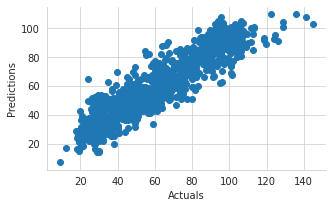

In [ ]:
pred = best_model.predict(X_test)
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(y_test, pred)
ax.grid(alpha=.9)
ax.set_xlabel('Actuals')
ax.set_ylabel('Predictions')
# ax.set_title('Actuals vs. Predictions', size=16)
sns.despine()

Generate prediction and compare to actual.

In [ ]:
def prep_solo_data(df, X_cols, y_col, norm_cols=None, window=window):
    X = df[X_cols]
    Y = df[y_col]
    std = StandardScaler()
    if norm_cols is not None:
        std.fit(X[norm_cols])
        X[norm_cols] = std.transform(X[norm_cols])
    else:
        std.fit(X)
        X = pd.DataFrame(std.transform(X),
                         index=X.index.values,
                         columns=X.columns)

    # Note:  smooth_df[y_col] is already shifted
    # back by -window

    return X, Y

X, Y = prep_solo_data(smooth_df, X_cols, y_col, norm_cols=norm_cols)

Prediction value of the next day.

In [ ]:
pred = best_model.predict(X.values).reshape(-1)
pred = pd.DataFrame(pred, index=pd.to_datetime(X.index.values),
                   columns=['pred'])

pred_df = pred.join(Y, how='inner')
pred_df = pred_df.dropna()
pred_df.tail()

,pred,dcoilwtico
2020-12-29,58.754372,52.26
2020-12-30,57.517708,52.16
2020-12-31,54.548809,53.55
2021-01-01,55.197437,53.55
2021-01-02,66.911804,53.55


Actual vs prediction graph plotting.

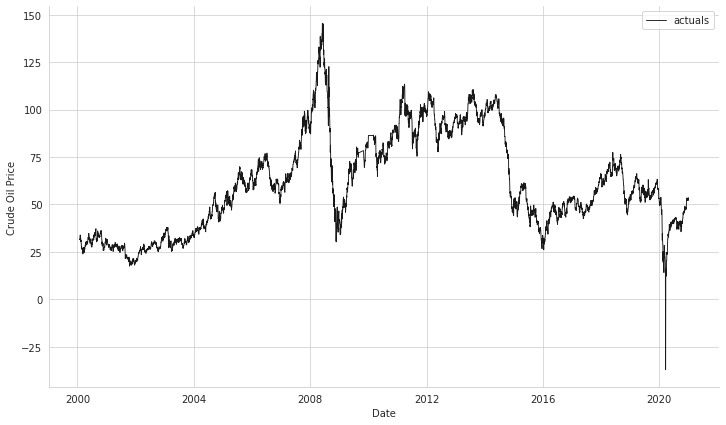

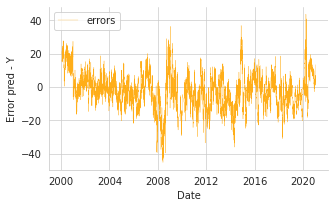


R-squared on entire dataset:  0.7714


RMSE on entire dataset:  10.7000



In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
# ax.plot(pred_df.index.values, pred_df['pred'], label='prediction',
#         alpha=.9, color='red',linestyle='-', linewidth=.3)
ax.plot(pred_df.index.values, pred_df[y_col], label='actuals',
        alpha=.9, color='black', linewidth=.9)
ax.grid(alpha=.9)
ax.set_xlabel('Date')
ax.set_ylabel('Crude Oil Price')
# ax.set_title('Actuals vs. Predictions of Best Model', size=16)
ax.legend(loc='best')
sns.despine()
plt.show()
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(5, 3))
errors = np.subtract(pred_df['pred'], pred_df[y_col])
ax.plot(pred_df.index.values, errors, label='errors',
        linestyle='-', color='orange', alpha=.9, linewidth=.3)
ax.grid(alpha=.9)
ax.set_xlabel('Date')
ax.set_ylabel('Error pred - Y')
# ax.set_title('Error of Best Model', size=16)
ax.legend(loc='best')
sns.despine()

plt.show()

r2_final = r2_score(pred_df['pred'], pred_df[y_col])
rmse_final = np.sqrt(mean_squared_error(pred_df['pred'], pred_df[y_col]))
print('''
R-squared on entire dataset:  %.4f
''' %r2_final)
print('''
RMSE on entire dataset:  %.4f
''' %rmse_final)